## ParFlow-CLM Water Balance Exercise
This notebook runs a ParFlow-CLM simulation and loads data to compare the fluxes calculated in CLM to the vector passed to ParFlow.  It covers some basics of model coupling and LSM processes.

### Goal
The goal of this exercise is to understand the setup and simulation results of a fully coupled ParFlow-CLM run. Processes included in this exercise are water redistriubtion in the variably saturated subsurface with overland flow at the surface and coupling with land surface processes related to evaporation, transpiration (root water uptake by plants) and infiltration (precipitation minus evaporation). A water balance illustrates the results.  

### Run ParFlow-CLM for 24 hours
The first cell of this notebook runs a single-column PF-CLM for a day, saving the output for analysis below.

### ParFlow-CLM water balance
The next cell in this notebook conducts a water balance with CLM output variables and the `EvapTrans` vector output by ParFlow.  This vector is an output of what CLM passes to ParFlow every timestep and can be used for diagnostics.  This vector can be used (as we did in earlier notebooks) to conduct a water balance of ParFlow but in this case we are just comparing the CLM output variables to the `EvapTrans` vector.   

In [1]:
# Import the ParFlow package
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists

print(os.getcwd())
relative_path_to_runfolder = 'output_water_balance'
base = get_absolute_path(relative_path_to_runfolder)
mkdir(base)
print(base)

# copy CLM files
cp('inputs/NM_US-Vcm_2020-01-01_2021-01-01/drv_clmin.dat', 'output_water_balance/drv_clmin.dat')
cp('inputs/NM_US-Vcm_2020-01-01_2021-01-01/drv_vegm_modified.dat', 'output_water_balance/drv_vegm.dat')
cp('inputs/NM_US-Vcm_2020-01-01_2021-01-01/drv_vegp.dat', 'output_water_balance/drv_vegp.dat')

alpha_vG = 100 #Set alpha for vanGenuchten model 2 or 100
head_table = -1 #location of water table [m]
Sigma_input = 2.0
DTWT = 'movng'  #depth to water table: fixed or movng
simulation_type = 'same_head' #'same_head'  #Simulations type: same_head vs same_saturation vs vegpvegm


# Set our Run Name 
PFCLM_SC_runoff = Run("PFCLM_SC_runoff")


stopt = 8760
## run only for 24 hours for the water balance example
#stopt = 24

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
PFCLM_SC_runoff.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

PFCLM_SC_runoff.Process.Topology.P = 1
PFCLM_SC_runoff.Process.Topology.Q = 1
PFCLM_SC_runoff.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
PFCLM_SC_runoff.ComputationalGrid.Lower.X = 0.0
PFCLM_SC_runoff.ComputationalGrid.Lower.Y = 0.0
PFCLM_SC_runoff.ComputationalGrid.Lower.Z = 0.0

PFCLM_SC_runoff.ComputationalGrid.NX      = 100
PFCLM_SC_runoff.ComputationalGrid.NY      = 1
PFCLM_SC_runoff.ComputationalGrid.NZ      = 20

PFCLM_SC_runoff.ComputationalGrid.DX      = 10.0
PFCLM_SC_runoff.ComputationalGrid.DY      = 1.0
PFCLM_SC_runoff.ComputationalGrid.DZ      = 0.1

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
PFCLM_SC_runoff.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
PFCLM_SC_runoff.GeomInput.domain_input.InputType = 'Box'
PFCLM_SC_runoff.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
PFCLM_SC_runoff.Geom.domain.Lower.X = 0.0
PFCLM_SC_runoff.Geom.domain.Lower.Y = 0.0
PFCLM_SC_runoff.Geom.domain.Lower.Z = 0.0

PFCLM_SC_runoff.Geom.domain.Upper.X = 1000.0
PFCLM_SC_runoff.Geom.domain.Upper.Y = 1.0
PFCLM_SC_runoff.Geom.domain.Upper.Z = 2.0

PFCLM_SC_runoff.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'


#--------------------------------------------
# variable dz assignments
#------------------------------------------

PFCLM_SC_runoff.Solver.Nonlinear.VariableDz = True
PFCLM_SC_runoff.dzScale.GeomNames           = 'domain'
PFCLM_SC_runoff.dzScale.Type                = 'nzList'
PFCLM_SC_runoff.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
PFCLM_SC_runoff.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
PFCLM_SC_runoff.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
PFCLM_SC_runoff.Cell._2.dzScale.Value  = 1.0   
PFCLM_SC_runoff.Cell._3.dzScale.Value  = 1.0
PFCLM_SC_runoff.Cell._4.dzScale.Value  = 1.0
PFCLM_SC_runoff.Cell._5.dzScale.Value  = 1.0
PFCLM_SC_runoff.Cell._6.dzScale.Value  = 1.0
PFCLM_SC_runoff.Cell._7.dzScale.Value  = 1.0
PFCLM_SC_runoff.Cell._8.dzScale.Value  = 1.0
PFCLM_SC_runoff.Cell._9.dzScale.Value  = 1.0
PFCLM_SC_runoff.Cell._10.dzScale.Value = 1.0
PFCLM_SC_runoff.Cell._11.dzScale.Value = 1.0
PFCLM_SC_runoff.Cell._12.dzScale.Value = 1.0
PFCLM_SC_runoff.Cell._13.dzScale.Value = 1.0
PFCLM_SC_runoff.Cell._14.dzScale.Value = 1.0
PFCLM_SC_runoff.Cell._15.dzScale.Value = 1.0
PFCLM_SC_runoff.Cell._16.dzScale.Value = 1.0
PFCLM_SC_runoff.Cell._17.dzScale.Value = 1.0
PFCLM_SC_runoff.Cell._18.dzScale.Value = 1.0
PFCLM_SC_runoff.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01  1 cm top layer

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
PFCLM_SC_runoff.Geom.Perm.Names              = 'domain'
#########################################################
#Old
# PFCLM_SC_runoff.Geom.domain.Perm.Type        = 'Constant'
# PFCLM_SC_runoff.Geom.domain.Perm.Value       = 0.0001465#0.0001465
# #PFCLM_SC_runoff.Geom.domain.Perm.Value       = 0.1465

# PFCLM_SC_runoff.Perm.TensorType              = 'TensorByGeom'
# PFCLM_SC_runoff.Geom.Perm.TensorByGeom.Names = 'domain'
# PFCLM_SC_runoff.Geom.domain.Perm.TensorValX  = 1.0
# PFCLM_SC_runoff.Geom.domain.Perm.TensorValY  = 1.0
# PFCLM_SC_runoff.Geom.domain.Perm.TensorValZ  = 1.0
#########################################################
    
    # -----------------------------------------------------------------------------
    # Corr rnd field
    # -----------------------------------------------------------------------------

    
## we use the parallel turning bands formulation in ParFlow to simulate
## GRF for upper and lower aquifer

PFCLM_SC_runoff.Geom.domain.Perm.Type = "TurnBands"
PFCLM_SC_runoff.Geom.domain.Perm.LambdaX = 50.0
PFCLM_SC_runoff.Geom.domain.Perm.LambdaY = 3.60
PFCLM_SC_runoff.Geom.domain.Perm.LambdaZ = 0.5
PFCLM_SC_runoff.Geom.domain.Perm.GeomMean = 0.1465#112.00 #0.0001465
PFCLM_SC_runoff.Geom.domain.Perm.Sigma = Sigma_input
PFCLM_SC_runoff.Geom.domain.Perm.NumLines = 150
PFCLM_SC_runoff.Geom.domain.Perm.RZeta = 5.0
PFCLM_SC_runoff.Geom.domain.Perm.KMax = 100.0000001
PFCLM_SC_runoff.Geom.domain.Perm.DelK = 0.2
PFCLM_SC_runoff.Geom.domain.Perm.Seed = 33333
PFCLM_SC_runoff.Geom.domain.Perm.LogNormal = "Log"
PFCLM_SC_runoff.Geom.domain.Perm.StratType = "Bottom"

# -----------------------------------------------------------------------------
# uncomment the lines below to run parallel gaussian instead
# of parallel turning bands

# hflow.Geom.upper_aquifer.Perm.Type = "ParGauss"

# hflow.Geom.upper_aquifer.Perm.Seed = 1
# hflow.Geom.upper_aquifer.Perm.MaxNPts = 70.0
# hflow.Geom.upper_aquifer.Perm.MaxCpts = 20


# pfset lower aqu and upper aq stats to pest/read in values
# -----------------------------------------------------------------------------

PFCLM_SC_runoff.Perm.TensorType = "TensorByGeom"

PFCLM_SC_runoff.Geom.Perm.TensorByGeom.Names = "domain"

PFCLM_SC_runoff.Geom.domain.Perm.TensorValX = 1.0
PFCLM_SC_runoff.Geom.domain.Perm.TensorValY = 1.0
PFCLM_SC_runoff.Geom.domain.Perm.TensorValZ = 1.0
    


#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

PFCLM_SC_runoff.SpecificStorage.Type              = 'Constant'
PFCLM_SC_runoff.SpecificStorage.GeomNames         = 'domain'
PFCLM_SC_runoff.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

PFCLM_SC_runoff.Phase.Names = 'water'

PFCLM_SC_runoff.Phase.water.Density.Type     = 'Constant'
PFCLM_SC_runoff.Phase.water.Density.Value    = 1.0

PFCLM_SC_runoff.Phase.water.Viscosity.Type   = 'Constant'
PFCLM_SC_runoff.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
PFCLM_SC_runoff.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

PFCLM_SC_runoff.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

PFCLM_SC_runoff.TimingInfo.BaseUnit     = 1.0
PFCLM_SC_runoff.TimingInfo.StartCount   = 0
PFCLM_SC_runoff.TimingInfo.StartTime    = 0.0
PFCLM_SC_runoff.TimingInfo.StopTime     = stopt
PFCLM_SC_runoff.TimingInfo.DumpInterval = 1.0
PFCLM_SC_runoff.TimeStep.Type           = 'Constant'
PFCLM_SC_runoff.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

PFCLM_SC_runoff.Geom.Porosity.GeomNames    = 'domain'

PFCLM_SC_runoff.Geom.domain.Porosity.Type  = 'Constant'
PFCLM_SC_runoff.Geom.domain.Porosity.Value = 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
PFCLM_SC_runoff.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
PFCLM_SC_runoff.Phase.water.Mobility.Type  = 'Constant'
PFCLM_SC_runoff.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

PFCLM_SC_runoff.Phase.RelPerm.Type        = 'VanGenuchten'
PFCLM_SC_runoff.Phase.RelPerm.GeomNames   = 'domain'

PFCLM_SC_runoff.Geom.domain.RelPerm.Alpha = alpha_vG
PFCLM_SC_runoff.Geom.domain.RelPerm.N     = 2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

PFCLM_SC_runoff.Phase.Saturation.Type        = 'VanGenuchten'
PFCLM_SC_runoff.Phase.Saturation.GeomNames   = 'domain'

PFCLM_SC_runoff.Geom.domain.Saturation.Alpha = alpha_vG
PFCLM_SC_runoff.Geom.domain.Saturation.N     = 3.0
PFCLM_SC_runoff.Geom.domain.Saturation.SRes  = 0.2
PFCLM_SC_runoff.Geom.domain.Saturation.SSat  = 1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
PFCLM_SC_runoff.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
PFCLM_SC_runoff.Cycle.Names = 'constant'
PFCLM_SC_runoff.Cycle.constant.Names = 'alltime'
PFCLM_SC_runoff.Cycle.constant.alltime.Length = 1
PFCLM_SC_runoff.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
PFCLM_SC_runoff.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

PFCLM_SC_runoff.Patch.x_lower.BCPressure.Type          = 'FluxConst'
PFCLM_SC_runoff.Patch.x_lower.BCPressure.Cycle         = 'constant'
PFCLM_SC_runoff.Patch.x_lower.BCPressure.alltime.Value = 0.0

PFCLM_SC_runoff.Patch.y_lower.BCPressure.Type          = 'FluxConst'
PFCLM_SC_runoff.Patch.y_lower.BCPressure.Cycle         = 'constant'
PFCLM_SC_runoff.Patch.y_lower.BCPressure.alltime.Value = 0.0

if DTWT == 'fixed':
    PFCLM_SC_runoff.Patch.z_lower.BCPressure.Type          = 'FluxConst'
    PFCLM_SC_runoff.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
    PFCLM_SC_runoff.Patch.z_lower.BCPressure.RefGeom       = 'domain'
    PFCLM_SC_runoff.Patch.z_lower.BCPressure.RefPatch      = 'z_upper'
    PFCLM_SC_runoff.Patch.z_lower.BCPressure.Cycle         = 'constant'
    PFCLM_SC_runoff.Patch.z_lower.BCPressure.alltime.Value = head_table
else:
    PFCLM_SC_runoff.Patch.z_lower.BCPressure.Type          = 'FluxConst'
    PFCLM_SC_runoff.Patch.z_lower.BCPressure.Cycle         = 'constant'
    PFCLM_SC_runoff.Patch.z_lower.BCPressure.alltime.Value = 0.0

PFCLM_SC_runoff.Patch.x_upper.BCPressure.Type          = 'FluxConst'
PFCLM_SC_runoff.Patch.x_upper.BCPressure.Cycle         = 'constant'
PFCLM_SC_runoff.Patch.x_upper.BCPressure.alltime.Value = 0.0

PFCLM_SC_runoff.Patch.y_upper.BCPressure.Type          = 'FluxConst'
PFCLM_SC_runoff.Patch.y_upper.BCPressure.Cycle         = 'constant'
PFCLM_SC_runoff.Patch.y_upper.BCPressure.alltime.Value = 0.0

PFCLM_SC_runoff.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
PFCLM_SC_runoff.Patch.z_upper.BCPressure.Cycle         = 'constant'
PFCLM_SC_runoff.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

PFCLM_SC_runoff.TopoSlopesX.Type              = 'Constant'
PFCLM_SC_runoff.TopoSlopesX.GeomNames         = 'domain'
PFCLM_SC_runoff.TopoSlopesX.Geom.domain.Value = 0.0

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

PFCLM_SC_runoff.TopoSlopesY.Type              = 'Constant'
PFCLM_SC_runoff.TopoSlopesY.GeomNames         = 'domain'
PFCLM_SC_runoff.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

PFCLM_SC_runoff.Mannings.Type               = 'Constant'
PFCLM_SC_runoff.Mannings.GeomNames          = 'domain'
PFCLM_SC_runoff.Mannings.Geom.domain.Value  = 1.e-5

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

PFCLM_SC_runoff.PhaseSources.water.Type              = 'Constant'
PFCLM_SC_runoff.PhaseSources.water.GeomNames         = 'domain'
PFCLM_SC_runoff.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

PFCLM_SC_runoff.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

PFCLM_SC_runoff.Solver         = 'Richards'
PFCLM_SC_runoff.Solver.MaxIter = 10000

PFCLM_SC_runoff.Solver.Nonlinear.MaxIter           = 1000
PFCLM_SC_runoff.Solver.Nonlinear.ResidualTol       = 1e-5
PFCLM_SC_runoff.Solver.Nonlinear.EtaChoice         = 'Walker1'
PFCLM_SC_runoff.Solver.Nonlinear.EtaValue          = 0.001
PFCLM_SC_runoff.Solver.Nonlinear.UseJacobian       = True
PFCLM_SC_runoff.Solver.Nonlinear.DerivativeEpsilon = 1e-12
PFCLM_SC_runoff.Solver.Nonlinear.StepTol           = 1e-30
PFCLM_SC_runoff.Solver.Nonlinear.Globalization     = 'LineSearch'
PFCLM_SC_runoff.Solver.Linear.KrylovDimension      = 100
PFCLM_SC_runoff.Solver.Linear.MaxRestarts          = 10
PFCLM_SC_runoff.Solver.Linear.Preconditioner       = 'PFMG'
PFCLM_SC_runoff.Solver.PrintSubsurf                = False
PFCLM_SC_runoff.Solver.Drop                        = 1E-20
PFCLM_SC_runoff.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True  #only PFB output for water balance example

PFCLM_SC_runoff.Solver.PrintOverlandSum = True

#  PFB  no SILO
PFCLM_SC_runoff.Solver.PrintSubsurf             = True
PFCLM_SC_runoff.Solver.PrintSubsurfData         = write_pfb
PFCLM_SC_runoff.Solver.PrintPressure            = write_pfb
PFCLM_SC_runoff.Solver.PrintSaturation          = write_pfb
PFCLM_SC_runoff.Solver.PrintCLM                 = write_pfb
PFCLM_SC_runoff.Solver.PrintMask                = write_pfb
PFCLM_SC_runoff.Solver.PrintSpecificStorage     = write_pfb
PFCLM_SC_runoff.Solver.PrintEvapTrans           = write_pfb
PFCLM_SC_runoff.Solver.PrintSlopes              = True
PFCLM_SC_runoff.Solver.PrintVelocities          = True 

PFCLM_SC_runoff.Solver.WriteSiloMannings        = False
PFCLM_SC_runoff.Solver.WriteSiloMask            = False
PFCLM_SC_runoff.Solver.WriteSiloSlopes          = False
PFCLM_SC_runoff.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#PFCLM_SC_runoff.NetCDF.NumStepsPerFile          = 240
PFCLM_SC_runoff.NetCDF.WritePressure            = write_netcdf
PFCLM_SC_runoff.NetCDF.WriteSubsurface          = False
PFCLM_SC_runoff.NetCDF.WriteSaturation          = write_netcdf
PFCLM_SC_runoff.NetCDF.WriteCLM                 = write_netcdf
#PFCLM_SC_runoff.NetCDF.CLMNumStepsPerFile       = 240

#-----------------------------------------------------------------------------
# Terrain following grid
#-----------------------------------------------------------------------------
PFCLM_SC_runoff.Solver.TerrainFollowingGrid = True         ## TCL syntax
PFCLM_SC_runoff.Solver.TerrainFollowingGrid.SlopeUpwindFormulation = "Upwind"    ## Python syntax


#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
PFCLM_SC_runoff.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
PFCLM_SC_runoff.Solver.CLM.MetForcing   = '1D'
#PFCLM_SC_runoff.Solver.CLM.MetFileName = 'forcing_1.txt'
PFCLM_SC_runoff.Solver.CLM.MetFileName  = 'forcing1D.US-Vcm.2020-01-01-2021-01-01.txt'
#PFCLM_SC_runoff.Solver.CLM.MetFileName  = 'pumphouse_forcing_wy17_wy19.txt'
PFCLM_SC_runoff.Solver.CLM.MetFilePath  = '/home/ms6985/ParFlow-project/pfclm_sc/inputs/NM_US-Vcm_2020-01-01_2021-01-01'

# Set CLM Plant Water Use Parameters
PFCLM_SC_runoff.Solver.CLM.EvapBeta       = 'Linear'
PFCLM_SC_runoff.Solver.CLM.VegWaterStress = 'Saturation'
PFCLM_SC_runoff.Solver.CLM.ResSat         = 0.205
PFCLM_SC_runoff.Solver.CLM.WiltingPoint   = 0.205
PFCLM_SC_runoff.Solver.CLM.FieldCapacity  = 1.00
PFCLM_SC_runoff.Solver.CLM.IrrigationType = 'none'
PFCLM_SC_runoff.Solver.CLM.RootZoneNZ     =  19
PFCLM_SC_runoff.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
PFCLM_SC_runoff.Solver.PrintLSMSink        = False
PFCLM_SC_runoff.Solver.CLM.CLMDumpInterval = 1
PFCLM_SC_runoff.Solver.CLM.CLMFileDir      = 'output/'
PFCLM_SC_runoff.Solver.CLM.BinaryOutDir    = False
PFCLM_SC_runoff.Solver.CLM.IstepStart      = 1
PFCLM_SC_runoff.Solver.WriteCLMBinary      = False
PFCLM_SC_runoff.Solver.WriteSiloCLM        = False
PFCLM_SC_runoff.Solver.CLM.WriteLogs       = False
PFCLM_SC_runoff.Solver.CLM.WriteLastRST    = True
PFCLM_SC_runoff.Solver.CLM.DailyRST        = False
PFCLM_SC_runoff.Solver.CLM.SingleFile      = True
#PFCLM_SC_runoff.NetCDF.Compression         = True
#PFCLM_SC_runoff.NetCDF.ROMIOhints='romio.hints'
#PFCLM_SC_runoff.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------
if simulation_type == 'same_saturation':
    filename=f"ic_pressure_WTD{head_table}_alpha{alpha_vG}.pfb"
    print(filename)
    PFCLM_SC_runoff.ICPressure.Type                 = "PFBFile"
    PFCLM_SC_runoff.ICPressure.GeomNames            = 'domain'
    PFCLM_SC_runoff.Geom.domain.ICPressure.FileName = filename
else:
    PFCLM_SC_runoff.ICPressure.Type                 = 'HydroStaticPatch' #'Constant' 
    PFCLM_SC_runoff.ICPressure.GeomNames            = 'domain'
    PFCLM_SC_runoff.Geom.domain.ICPressure.Value    = head_table
    PFCLM_SC_runoff.Geom.domain.ICPressure.RefGeom  = 'domain'
    PFCLM_SC_runoff.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------
import time
start_= time.time()
PFCLM_SC_runoff.run(working_directory=base)
end_  = time.time()

print("The code takes", end_ - start_," seconds")


/home/ms6985/ParFlow-project/pfclm_sc
/home/ms6985/ParFlow-project/pfclm_sc/output_water_balance

# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/75cacb0
# ParFlow version
#  - 3.13.0
# Working directory
#  - /home/ms6985/ParFlow-project/pfclm_sc/output_water_balance
# ParFlow database
#  - PFCLM_SC_runoff.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully
# ==============================================================================

The code takes 262.8243179321289  seconds


In [2]:
## load PFCLM output and conduct a detailed water balance

import parflow as pf
import matplotlib.pyplot as plt
import numpy as np
from set_demo_defaults import *
import os
#import netCDF4 as nc
import xarray as xr
import time as timer
from parflow.tools.fs import get_absolute_path
from parflow.tools.io import write_pfb, read_pfb
from glob import glob
import pandas as pd
import parflow as pf
from pathlib import Path
from numpy import ones, kron

from parflow import Run
import parflow.tools.hydrology as hydro

path = ''
current_dir = os.getcwd()
print(current_dir)
relative_path_to_runfolder = 'output_water_balance'
path = current_dir+'/'+relative_path_to_runfolder
print(path)
 
path_forcing = current_dir+'/forcing'
print(path_forcing)

run_name = 'PFCLM_SC_runoff'
run = Run.from_definition(f'{path}/{run_name}.pfidb')
data = run.data_accessor
nx = data.shape[2]
ny = data.shape[1]
nz = data.shape[0]
dx = data.dx
dy = data.dy
dz = data.dz

# intialize data and time arrays
data    = np.zeros([8,8760])
time    = np.zeros([8760])

#CLM data array format 
# reading the CLM file PFCLM_SC_runoff.out.clm_output.<file number>.C.pfb
# variables are by layer:
# 0 eflx_lh_tot:  total latent heat flux (Wm-2)  
# 1 eflx_lwrad_out: total upward LW radiation (Wm-2)  
# 2 eflx_sh_tot: total sensible heat flux (Wm-2)  
# 3 eflx_soil_grnd: ground heat flux (Wm-2)    
# 4 qflx_evap_tot: net veg. evaporation and transpiration and soil evaporation (mms-1)  
# 5 qflx_evap_grnd: ground evaporation (mms-1)   
# 6 qflx_evap_soi: soil evaporation (mms-1)   
# 7 qflx_evap_veg: vegetation evaporation (canopy) and transpiration (mms-1)   
# 8 qflx_tran_veg: transpiration (mms-1)  
# 9 qflx_infl: infiltration flux (mms-1)   
# 10 swe_out: SWE (mm)   
# 11 t_grnd: ground temperature (K)  
# 12 irrigation flux
# 13 - 24 Soil temperature by layer (K)


#  assemble files to be loaded as an entire sequence
# then map specific variables to the data array which holds things for analysis
# and plotting

files = glob(path+"/PFCLM_SC_runoff.out.clm_output.*.C.pfb")
#print(files[0,10])
CLM_data = pf.read_pfb_sequence(files)

## create data frame for CLM output ET vars
clm_output = pd.DataFrame({'T [mm/s]':CLM_data[:,8,0,0],'Ebs [mm/s]':CLM_data[:,6,0,0],'Qflux infil [mm/s]':CLM_data[:,9,0,0],'Qflux irrig [mm/s]':CLM_data[:,12,0,0],'qflx_evap_grnd [mm/s]':CLM_data[:,5,0,0] })
## the variables we use here are chosen to represent the fluxes passed to ParFlow, detailed below
#clm_output_full = pd.DataFrame({'T [mm/s]':CLM_data[:,8,0,:],'Ebs [mm/s]':CLM_data[:,6,0,:],'Qflux infil [mm/s]':CLM_data[:,9,0,:],'Qflux irrig [mm/s]':CLM_data[:,12,0,:],'qflx_evap_grnd [mm/s]':CLM_data[:,5,0,:] })

clm_output_T_mmps = CLM_data[:,8,0,:]
clm_output_Ebs_mmps = CLM_data[:,6,0,:]

np.shape(clm_output_T_mmps)
np.shape(clm_output_Ebs_mmps)
np.shape(CLM_data)

# # load forcing, single column, variables are
# #DSWR:  Downward Visible or Short-Wave radiation [W/m2]
# #DLWR:  Downward Infa-Red or Long-Wave radiation [W/m2]
# #APCP:  Precipitation rate [mm/s]
# #Temp:  Air temperature [K]
# #UGRD:  West-to-East or U-component of wind [m/s]
# #VGRD:  South-to-North or V-component of wind [m/s]
# #Press: Atmospheric Pressure [pa]
# #SPFH:  Water-vapor specific humidity [kg/kg]


/home/ms6985/ParFlow-project/pfclm_sc
/home/ms6985/ParFlow-project/pfclm_sc/output_water_balance
/home/ms6985/ParFlow-project/pfclm_sc/forcing
  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx


/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)


(8760, 32, 1, 100)

### Question: *Why are there differences between the approaches for calculating fluxes from CLM to PF?*
The two approaches `Balance` and `Balance2` are very similar but not exactly the same.  Is this close-enough or are we missing water somewhere?  If so, why might this be?

### Task: Discuss these questions in your small groups, determine if the water balance is *close-enough* or if water is being missed.  What might this water be?  How might you determine what differences might exist between output variables in `CLM`?

In [3]:
# base = f'{path}/{run_name}'
# print(base)
# def plot_vert_var(base,variable, time_array,alpha_=2):
#     """Function to plot output from a ParFlow run"""

#     # Load the run from the file, this is the same as the run defined above
#     run = Run.from_definition(f'{base}.pfidb')  

#     data = run.data_accessor # get the data accessor, this makes it easier to access the data from the run
#     nt = len(data.times)  # get the number of time steps
#     nx = data.shape[2]    # get the number of cells in the x direction
#     ny = data.shape[1]    # get the number of cells in the y direction
#     nz = data.shape[0]    # get the number of cells in the z direction
#     dx = data.dx          # get the cell size in the x direction
#     dy = data.dy          # get the cell size in the y direction
#     dz = data.dz          # get the cell size in the z direction, this is a 1D array of size nz

#     # Print a summary of the run data
#     #print(f"nx = {nx}, ny = {ny}, nz = {nz}, nt = {nt}")
#     #print(f"dx = {dx}, dy = {dy}, dz = {dz[0]}")

    

#     for timestep in time_array:
#         # Load the data
#         if variable == "porosity":
#             data = read_pfb(get_absolute_path(f"PFCLM_SC_runoff.out.{variable}.pfb")).reshape(nz, nx)
#         elif variable == "mannings":
#             data = read_pfb(get_absolute_path(f"PFCLM_SC_runoff.out.mannings.pfb"))[0, :, :]
#         else:
#             data = read_pfb(get_absolute_path(f"PFCLM_SC_runoff.out.{variable}.{str(timestep).zfill(5)}.pfb")).reshape(nz, nx)
        
#         # Set negative saturation values to NaN
#         if variable == "satur":
#             data[data < 0.0] = np.nan
        
#         # Set up x and z to match the shape of the ParFlow grid
#         x = np.arange(0.0,(nx+1)*dx,dx)
#         y = np.arange(0.0,(ny+1)*dy,dy)
#         z = np.zeros(nz+1)
#         z[1:] = np.cumsum(dz)

#         #print(f"x = {x}, y = {y}, z = {z}")
#         #print(f"Shapes of : x = {x.shape}, y = {y.shape}, z = {z.shape}")

#         # Get limits for plotting
#         vmin = np.nanmin(data)
#         vmax = np.nanmax(data)
#         #print(f"vmin: {vmin}, vmax: {vmax}")
        
#         # Define labels for plots
#         if variable == "satur":
#             label = "Saturation [-]"
#             title = "Saturation [-]"
#         elif variable == "press":
#             label = "Pressure Head [m]"
#             title = "Pressure Head [m]"
#         elif variable == "porosity":
#             label = "Porosity"
#             title = "Porosity"
#         elif variable == "mannings":
#             label = "Mannings"
#             title = "Mannings"

#         #print(data.shape)

#         if timestep ==0:
#             data_array = data
#         else:
#             data_array = np.concatenate((data_array,data),axis=1 )

#     z_mid = np.transpose(np.array([z[1:]-dz/2]))

#     z_array = np.kron(np.ones(len(time_array)),z_mid)
#     time_array_plot = np.kron(np.ones(z_mid.shape),np.array([time_array]))

#     #print('Size: z',z.shape, 'time_array', time_array)
#     #print('Size: z_array-',z_array.shape,'time_array', time_array_plot.shape,'data_array', data_array.shape)
#     # Use pcolormesh to plot the data with the x and z coordinates with lines 
#     # for the grid mesh from the ParFlow run grid

#     #im = ax.pcolormesh(x, y, data, vmin=vmin, vmax=vmax, cmap='plasma_r')
#     fig = plt.figure(figsize=(8,8) , dpi=100)
#     #im = plt.plot(data,z[1:]-dz/2)#Plotting at cell centers
#     if variable == "satur":
#         im = plt.contourf(time_array_plot,z_array,data_array,400, cmap='Blues',vmin=0,vmax=1.0,antialiased=False,edgecolor='face')
#     else:
#         im = plt.contourf(time_array_plot,z_array,data_array,400, cmap='Blues',antialiased=False,edgecolor='face')        
#     plt.xlabel(f"time [hours]")
#     cbar = fig.colorbar(im)    
#     cbar.ax.set_ylabel(f"{title}")
#     plt.ylabel('z [m]')
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#     plt.legend(loc='best', frameon=False)
#     if simulation_type == 'same_saturation' or simulation_type == 'vegpvegm':
#         np.savez(f'{simulation_type}_{variable}_contour_alpha{alpha_}_WTD_{head_table}',time_array_plot,z_array,data_array)
#         plt.savefig(f'{simulation_type}_{variable}_contour_alpha{alpha_}_depthvstime_WTD{head_table}.pdf',bbox_inches='tight', dpi = 600)
#     else:
#         np.savez(f'{variable}_contour_alpha{alpha_}_WTD_{head_table}',time_array_plot,z_array,data_array)  
#         plt.savefig(f'{variable}_contour_alpha{alpha_}_depthvstime_WTD{head_table}.pdf',bbox_inches='tight', dpi = 600)

# plot_vert_var(base, "satur", np.linspace(0,8760,8761).astype('int'),alpha_vG)
# plot_vert_var(base, "press", np.linspace(0,8760,8761).astype('int'),alpha_vG)



# ## make a plot of the output from the PFCLM run

# res_sat = np.zeros(8760)
# res_sat[:] = run.Solver.CLM.ResSat
# porosity = run.Geom.domain.Porosity.Value

# hvap   = 2.5104e06 #Latent heat of evap for water [J/kg]

# # Plot the transpiration and soil evaporation for our PFCLM run
# fig = plt.figure(figsize=(8,8) , dpi=100)
# plt.plot(clm_output['T [mm/s]']*(3600*24), label='Transpiration', color=blue,linewidth=3)  
# plt.plot(clm_output['Ebs [mm/s]']*(3600*24), label='Soil Evap', color=red,linewidth=3)  
# plt.xlabel('Time [hr]')  
# plt.ylabel('Flux [mm/d]')  ## note that we converted the fluxes to mm/d
# plt.legend()
# plt.savefig(f'2D_alpha{alpha_vG}_ET_depthvstime_WTD{head_table}.pdf',bbox_inches='tight', dpi = 600)


## Using calendar dates for plotting

In [4]:
print("The total ET is ",np.sum(clm_output['T [mm/s]']*3600)+ np.sum(clm_output['Ebs [mm/s]']*3600),"mm for alpha=",alpha_vG,"and WTD=",head_table, "m.")

The total ET is  69.09169094807956 mm for alpha= 100 and WTD= -1 m.


In [5]:
# base = f'{path}/{run_name}'
# print(base)
# def plot_vert_var_combined(base,variable, time_array,d,alpha_=2):
#     """Function to plot output from a ParFlow run"""

#     # Load the run from the file, this is the same as the run defined above
#     run = Run.from_definition(f'{base}.pfidb')  

#     data = run.data_accessor # get the data accessor, this makes it easier to access the data from the run
#     nt = len(data.times)  # get the number of time steps
#     nx = data.shape[2]    # get the number of cells in the x direction
#     ny = data.shape[1]    # get the number of cells in the y direction
#     nz = data.shape[0]    # get the number of cells in the z direction
#     dx = data.dx          # get the cell size in the x direction
#     dy = data.dy          # get the cell size in the y direction
#     dz = data.dz          # get the cell size in the z direction, this is a 1D array of size nz

#     # Print a summary of the run data
#     #print(f"nx = {nx}, ny = {ny}, nz = {nz}, nt = {nt}")
#     #print(f"dx = {dx}, dy = {dy}, dz = {dz[0]}")
#     t_array = time_array.astype(np.float64)
#     t_time_datetime = ([d + timedelta(hours = i) for i in t_array])
    
#     time_array_datetime = np.tile(t_time_datetime, (nz,1))
    

#     for timestep in time_array:
#         # Load the data
#         if variable == "porosity":
#             data = read_pfb(get_absolute_path(f"PFCLM_SC_runoff.out.{variable}.pfb")).reshape(nz, nx)
#         elif variable == "mannings":
#             data = read_pfb(get_absolute_path(f"PFCLM_SC_runoff.out.mannings.pfb"))[0, :, :]
#         else:
#             data = read_pfb(get_absolute_path(f"PFCLM_SC_runoff.out.{variable}.{str(timestep).zfill(5)}.pfb")).reshape(nz, nx)
        
#         # Set negative saturation values to NaN
#         if variable == "satur":
#             data[data < 0.0] = np.nan
        
#         # Set up x and z to match the shape of the ParFlow grid
#         x = np.arange(0.0,(nx+1)*dx,dx)
#         y = np.arange(0.0,(ny+1)*dy,dy)
#         z = np.zeros(nz+1)
#         z[1:] = np.cumsum(dz)

#         #print(f"x = {x}, y = {y}, z = {z}")
#         #print(f"Shapes of : x = {x.shape}, y = {y.shape}, z = {z.shape}")

#         # Get limits for plotting
#         vmin = np.nanmin(data)
#         vmax = np.nanmax(data)
#         #print(f"vmin: {vmin}, vmax: {vmax}")
        
#         # Define labels for plots
#         if variable == "satur":
#             label = "Saturation [-]"
#             title = "Saturation [-]"
#         elif variable == "press":
#             label = "Pressure Head [m]"
#             title = "Pressure Head [m]"
#         elif variable == "porosity":
#             label = "Porosity"
#             title = "Porosity"
#         elif variable == "mannings":
#             label = "Mannings"
#             title = "Mannings"

#         #print(data.shape)

#         if timestep ==0:
#             data_array = data
#         else:
#             data_array = np.concatenate((data_array,data),axis=1 )

#     z_mid = np.transpose(np.array([z[1:]-dz/2]))

#     z_array = np.kron(np.ones(len(time_array)),z_mid)

#     #print('Size: z',z.shape, 'time_array', time_array)
#     #print('Size: z_array-',z_array.shape,'time_array', time_array_plot.shape,'data_array', data_array.shape)
#     # Use pcolormesh to plot the data with the x and z coordinates with lines 
#     # for the grid mesh from the ParFlow run grid

#     #im = ax.pcolormesh(x, y, data, vmin=vmin, vmax=vmax, cmap='plasma_r')
#     fig = plt.figure(figsize=(8,4) , dpi=100)
#     #im = plt.plot(data,z[1:]-dz/2)#Plotting at cell centers
#     if variable == "satur":
#         im = plt.contourf(time_array_datetime,z_array,data_array,400,vmin=0.2,vmax=1.0, cmap='Blues',antialiased=False,edgecolor='face')#, clim=[0.2,1.0], extend='min')
#         im.set_clim(0.2,1.0)
#         plt.clim(0.2,1.0)
#     else:
#         im = plt.contourf(time_array_datetime,z_array,data_array,400, cmap='Blues',antialiased=False,edgecolor='face')        
#     plt.xlabel(f"Calendar dates")
#     cbar = fig.colorbar(im) 
#     cbar.ax.set_ylabel(f"{title}") 
#     if variable == "satur":
#         cbar.ax.set_yticks([0.2,0.4,0.6,0.8,1.0]) 
#     plt.ylabel('z [m]')
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#     plt.xticks(rotation = 30)
#     plt.legend(loc='best', frameon=False)
#     if simulation_type == 'same_saturation' or simulation_type == 'vegpvegm':
#         plt.savefig(f'{simulation_type}_{variable}_contour_alpha{alpha_}_depthvstime_WTD{head_table}_new.pdf',bbox_inches='tight', dpi = 600)
#     else:
#         plt.savefig(f'{variable}_contour_alpha{alpha_}_depthvstime_WTD{head_table}_new.pdf',bbox_inches='tight', dpi = 600)

# plot_vert_var_combined(base, "satur", np.linspace(0,8760,8761).astype('int'),d,alpha_vG)
# plot_vert_var_combined(base, "press", np.linspace(0,8760,8761).astype('int'),d,alpha_vG)

In [6]:
# import parflow.tools.hydrology as hydro
# from glob import glob
# import matplotlib.pyplot as plt
# import numpy as np
# from parflow.tools.fs import get_absolute_path, cp, rm, mkdir, exists
# import parflow as pf

# def surface_subsurface_storage(alpha_vG,dir_name):
#     run = Run.from_definition(f'{dir_name}.pfidb')
#     data = run.data_accessor
#     nt = len(data.times)
#     nx = data.shape[2]
#     ny = data.shape[1]
#     nz = data.shape[0]
#     dx = data.dx
#     dy = data.dy
#     dz = data.dz
    
#     #print(nt,nx,ny,nz,dx,dy,dz)
    
#     porosity = data.computed_porosity 
#     specific_storage = data.specific_storage
    
#     mannings = run.Mannings.Geom.domain.Value
    
#     ## remove input filenames for TopoSlopes to force the data accessor to read the output slopes
#     ## this fixes a windows issue
#     run.TopoSlopesX.FileName = None
#     run.TopoSlopesY.FileName = None

#     #Combining all outputs
#     files = glob(f"{dir_name}.out.satur.*.pfb")
#     saturation_arrays = pf.read_pfb_sequence(files)
#     files = glob(f"{dir_name}.out.press.*.pfb")
#     pressure_arrays = pf.read_pfb_sequence(files)

#     subsurface_storage = np.zeros(nt+1)
#     surface_storage = np.zeros(nt+1)
#     data.time = 0

    
#     for i, (pressure, saturation) in enumerate(zip(pressure_arrays, saturation_arrays)):
#         subsurface_storage[i, ...] = np.sum(hydro.calculate_subsurface_storage(porosity, pressure, saturation, specific_storage, dx, dy, dz, mask = None),axis=(0, 1, 2))
#         # total surface storage for this time step is the summation of substorage surface across all x/y slices
#         surface_storage[i, ...] = np.sum( hydro.calculate_surface_storage(pressure, dx, dy, mask = None),axis=(0, 1))
#         data.time = i
#         #print(subsurface_storage[i, ...])
#         #print(i,np.sum(porosity*saturation*dx*dy*dz[0]*(1+specific_storage)))

#     np.savez(f'PFCLM_NM_surface_subsurface_storage_alphavG{alpha_vG}_head{head_table}m',subsurface_storage,surface_storage)  
#     #plotting components of water balance
#     fig, axs = plt.subplots(2, sharex=True)
#     fig.suptitle(f'Alpha={alpha_vG}, WTD={head_table}m')
#     axs[0].plot(subsurface_storage[:-1]-subsurface_storage[0], linewidth=3, color = brown)
#     axs[0].set_title("$\Delta$ Ss. St. [m]")
#     axs[1].plot(surface_storage[:-1], linewidth=3, color =blue)
#     axs[1].set_title("Surface Storage [m]")
#     plt.xlabel('Simulated Hours')
#     plt.subplots_adjust(left=0.1,
#                         bottom=0.1, 
#                         right=0.9, 
#                         top=0.85, 
#                         wspace=0.7, 
#                         hspace=1.0)
#     axs[1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#     plt.savefig(f'PFCLM_NM_surface_subsurface_storage_alphavG{alpha_vG}_head{head_table}m.pdf',bbox_inches='tight', dpi = 600)

# surface_subsurface_storage(alpha_vG,base)

In [7]:
# #Compare the two contours
# #WTD = -1m
# data = np.load('press_contour_alpha2_WTD_-1.npz')
# #print(data)
# time_array_plot = data['arr_0']; z_array = data['arr_1']; press2_data_array = data['arr_2']
# print('Time: min',np.min(time_array_plot), 'max:',np.max(time_array_plot), 'z: min',np.min(z_array), 'max:',np.max(z_array), 'Pressure: min',np.min(press2_data_array), 'max:',np.max(press2_data_array) )
# # plt.figure()
# # plt.contourf(time_array_plot,z_array,press2_data_array,400, cmap='Blues',vmin=0,vmax=1.0)
# # plt.colorbar()
# # plt.show
# data = np.load('satur_contour_alpha2_WTD_-1.npz');   satur2_data_array   = data['arr_2']
# data = np.load('press_contour_alpha100_WTD_-1.npz'); press100_data_array = data['arr_2']
# data = np.load('satur_contour_alpha100_WTD_-1.npz'); satur100_data_array = data['arr_2']

# variable_array = ["satur","press"] #satur or press

# for variable in variable_array:
#     fig = plt.figure(figsize=(8,8) , dpi=100)
#     if variable == "satur":
#         label = "Saturation [-]"
#         title = "Saturation [-]"
#     elif variable == "press":
#         label = "Pressure Head [m]"
#         title = "Pressure Head [m]"
#     elif variable == "porosity":
#         label = "Porosity"
#         title = "Porosity"
#     elif variable == "mannings":
#         label = "Mannings"
#         title = "Mannings"

#     if variable == "satur":
#         im = plt.contourf(time_array_plot,z_array,satur2_data_array-satur100_data_array,400, cmap='Blues',vmin=0,vmax=1.0,antialiased=False,edgecolor='face')
#     else:
#         im = plt.contourf(time_array_plot,z_array,press2_data_array-press100_data_array,400, cmap='Blues',antialiased=False,edgecolor='face')        
#     plt.xlabel(f"time [hours]")
#     cbar = fig.colorbar(im)

#     cbar.ax.set_ylabel(f"Difference in {title}")
#     plt.ylabel('z [m]')
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#     plt.legend(loc='best', frameon=False)
#     plt.savefig(f'NM_US-Vcm_2020-01-01_2021-01-01_{variable}_contour_difference_depthvstime_WTD-1_alpha_2_10.pdf',bbox_inches='tight', dpi = 600)       

In [8]:
# #Compare the two contours
# #WTD = -10m
# data = np.load('press_contour_alpha2_WTD_-10.npz')
# #print(data)
# time_array_plot = data['arr_0']; z_array = data['arr_1']; press2_data_array = data['arr_2']
# print('Time: min',np.min(time_array_plot), 'max:',np.max(time_array_plot), 'z: min',np.min(z_array), 'max:',np.max(z_array), 'Pressure: min',np.min(press2_data_array), 'max:',np.max(press2_data_array) )
# # plt.figure()
# # plt.contourf(time_array_plot,z_array,press2_data_array,400, cmap='Blues',vmin=0,vmax=1.0)
# # plt.colorbar()
# # plt.show
# data = np.load('satur_contour_alpha2_WTD_-10.npz');   satur2_data_array   = data['arr_2']
# data = np.load('press_contour_alpha100_WTD_-10.npz'); press100_data_array = data['arr_2']
# data = np.load('satur_contour_alpha100_WTD_-10.npz'); satur100_data_array = data['arr_2']

# variable_array = ["satur","press"] #satur or press

# for variable in variable_array:
#     fig = plt.figure(figsize=(8,8) , dpi=100)
#     if variable == "satur":
#         label = "Saturation [-]"
#         title = "Saturation [-]"
#     elif variable == "press":
#         label = "Pressure Head [m]"
#         title = "Pressure Head [m]"
#     elif variable == "porosity":
#         label = "Porosity"
#         title = "Porosity"
#     elif variable == "mannings":
#         label = "Mannings"
#         title = "Mannings"

#     if variable == "satur":
#         im = plt.contourf(time_array_plot,z_array,satur2_data_array-satur100_data_array,400, cmap='Blues',vmin=0,vmax=1.0,antialiased=False,edgecolor='face')
#     else:
#         im = plt.contourf(time_array_plot,z_array,press2_data_array-press100_data_array,400, cmap='Blues',antialiased=False,edgecolor='face')        
#     plt.xlabel(f"time [hours]")
#     cbar = fig.colorbar(im)

#     cbar.ax.set_ylabel(f"Difference in {title}")
#     plt.ylabel('z [m]')
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#     plt.legend(loc='best', frameon=False)
#     plt.savefig(f'NM_US-Vcm_2020-01-01_2021-01-01{variable}_contour_difference_depthvstime_WTD-10_alpha_2_100.pdf',bbox_inches='tight', dpi = 600)       

In [9]:
# #Compare the two contours
# #WTD = -10m
# data = np.load('press_contour_alpha2_WTD_-10.npz')
# #print(data)
# time_array_plot = data['arr_0']; z_array = data['arr_1']; press2_data_array = data['arr_2']
# print('Time: min',np.min(time_array_plot), 'max:',np.max(time_array_plot), 'z: min',np.min(z_array), 'max:',np.max(z_array), 'Pressure: min',np.min(press2_data_array), 'max:',np.max(press2_data_array) )
# # plt.figure()
# # plt.contourf(time_array_plot,z_array,press2_data_array,400, cmap='Blues',vmin=0,vmax=1.0)
# # plt.colorbar()
# # plt.show
# data = np.load('satur_contour_alpha2_WTD_-10.npz');   satur2_data_array   = data['arr_2']
# data = np.load('press_contour_alpha100_WTD_-10.npz'); press100_data_array = data['arr_2']
# data = np.load('satur_contour_alpha100_WTD_-10.npz'); satur100_data_array = data['arr_2']

# variable_array = ["satur","press"] #satur or press

# for variable in variable_array:
#     fig = plt.figure(figsize=(8,8) , dpi=100)
#     if variable == "satur":
#         label = "Saturation [-]"
#         title = "Saturation [-]"
#     elif variable == "press":
#         label = "Pressure Head [m]"
#         title = "Pressure Head [m]"
#     elif variable == "porosity":
#         label = "Porosity"
#         title = "Porosity"
#     elif variable == "mannings":
#         label = "Mannings"
#         title = "Mannings"

#     if variable == "satur":
#         im = plt.contourf(time_array_plot,z_array,satur2_data_array-satur100_data_array,400, cmap='Blues',vmin=0,vmax=1.0,antialiased=False,edgecolor='face')
#     else:
#         im = plt.contourf(time_array_plot,z_array,press2_data_array-press100_data_array,400, cmap='Blues',antialiased=False,edgecolor='face')        
#     plt.xlabel(f"time [hours]")
#     cbar = fig.colorbar(im)

#     cbar.ax.set_ylabel(f"Difference in {title}")
#     plt.ylabel('z [m]')
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#     plt.legend(loc='best', frameon=False)
#     plt.savefig(f'NM_US-Vcm_2020-01-01_2021-01-01{variable}_contour_difference_depthvstime_WTD-10_alpha_2_100.pdf',bbox_inches='tight', dpi = 600)

  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx
100 10.0 1 1.0 20
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0.]]] [[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0.]]]


/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)


alphavG100_WTD-1_dx10.0m
The surface storage is 1907.6899009764038 m2
The change subsurface storage is 222.98660627716367 m2
The total outflow during this period 0.0 m2


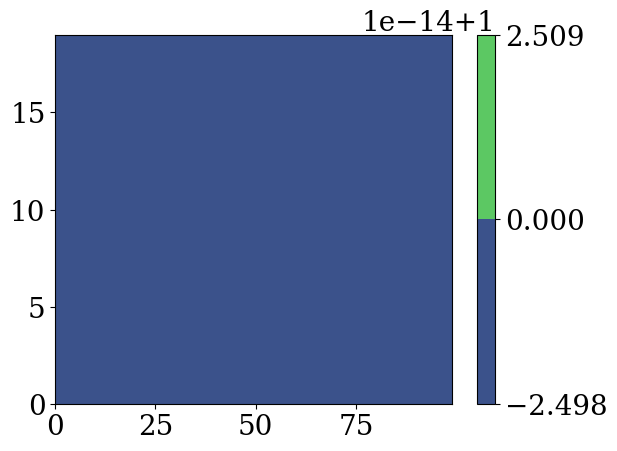

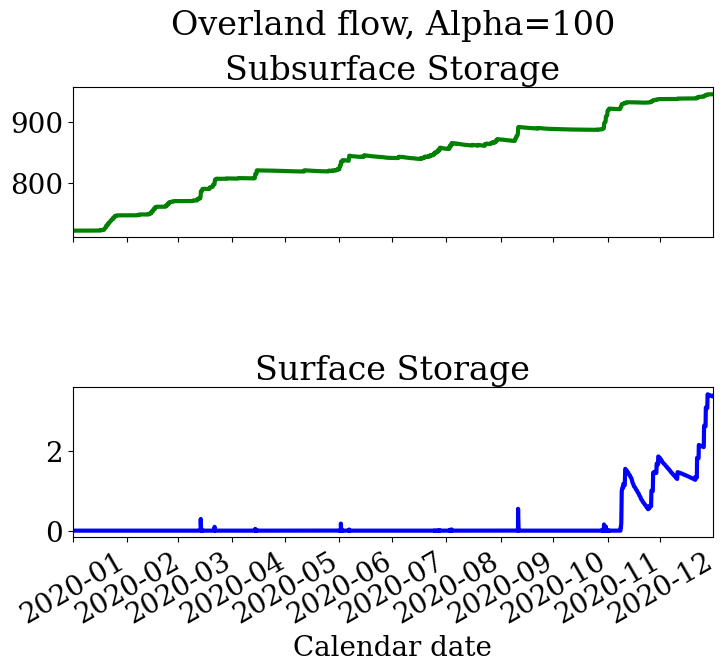

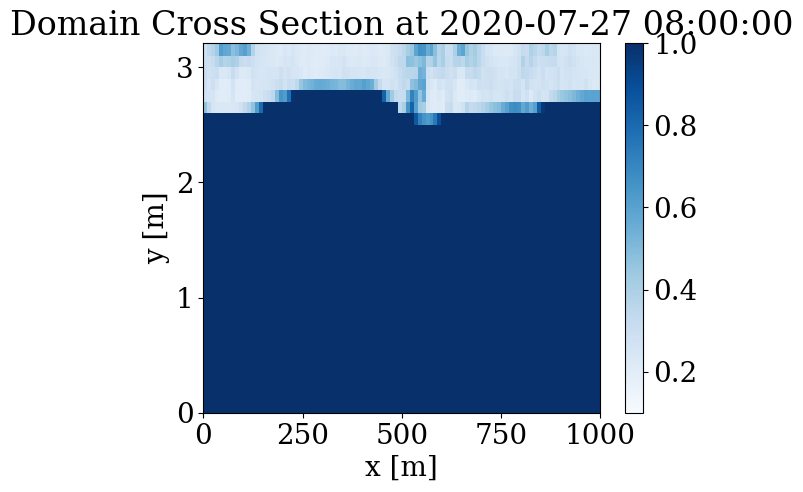

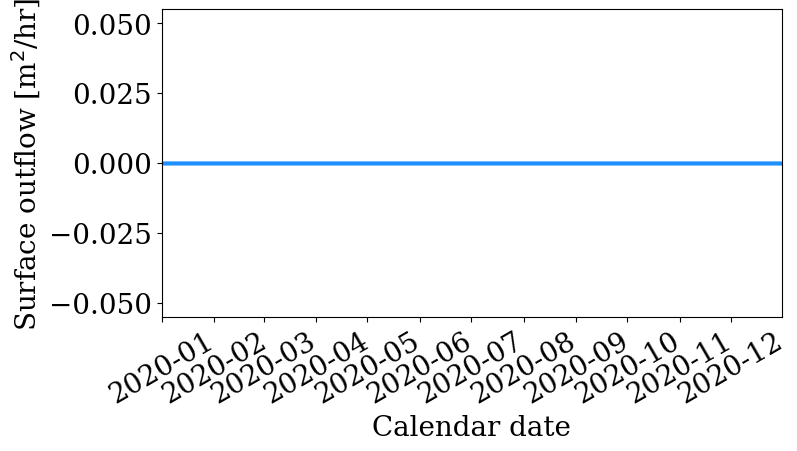

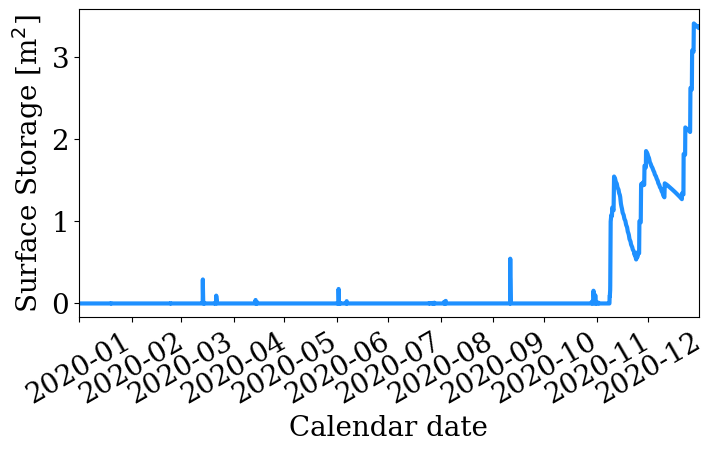

In [10]:
import parflow.tools.hydrology as hydro
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from parflow.tools.fs import get_absolute_path, cp, rm, mkdir, exists
import parflow as pf

from datetime import datetime, timedelta
d = datetime(2020, 1, 1, 0, 0)

#print(d + timedelta(hours = time_array_plot[0,2]))
time_array_one_row = np.linspace(0,8760,8761)#time_array_plot[0,:]

t_time_datetime = ([d + timedelta(hours = i) for i in time_array_one_row])

time_array_datetime = np.tile(t_time_datetime, (20,1))

def surface_subsurface_storage(alpha_vG,dir_name,run_name):
    run = Run.from_definition(f'{dir_name}/{run_name}.pfidb')
    data = run.data_accessor
    nt = len(data.times)
    nx = data.shape[2]
    ny = data.shape[1]
    nz = data.shape[0]
    dx = data.dx
    dy = data.dy
    dz = data.dz

    # Set up x and z to match the shape of the ParFlow grid
    x = np.arange(0.0,(nx+1)*dx,dx)
    y = np.arange(0.0,(ny+1)*dy,dy)
    z = np.zeros(nz+1)
    z[1:] = np.cumsum(dz)
    print(nx,dx,ny,dy,nz)
    
    #print(nt,nx,ny,nz,dx,dy,dz)
    
    porosity = data.computed_porosity 
    specific_storage = data.specific_storage 
    mannings = run.Mannings.Geom.domain.Value
    
    ## remove input filenames for TopoSlopes to force the data accessor to read the output slopes
    ## this fixes a windows issue
    run.TopoSlopesX.FileName = None
    run.TopoSlopesY.FileName = None
    
    slopex = data.slope_x 
    slopey = data.slope_y 
    mask   = data.mask
    
    # formatting the mask so that values outside the domain are NA and inside the domain are 1
    nanmask=mask.copy()
    nanmask[nanmask == 0] = 'NaN'
    nanmask[nanmask > 0] = 1
    print(slopex,slopey)
    plt.figure()
    plt.contourf(data.mask[:,0,:])
    plt.colorbar()

    files = glob(dir_name+f"/{run_name}.out.satur.*.pfb")
    sat = pf.read_pfb_sequence(files)
    files = glob(dir_name+f"/{run_name}.out.press.*.pfb")
    press = pf.read_pfb_sequence(files)
    files = glob(dir_name+f"/{run_name}.out.overlandsum.*.pfb")
    overland_sum = pf.read_pfb_sequence(files)
    pressure_arrays = press
    saturation_arrays = sat

    outflow = overland_sum[:,0,0,0]  

    subsurface_storage = np.zeros(nt+1)
    surface_storage = np.zeros(nt+1)
    wtd = np.zeros((nt+1, ny, nx))
    data.time = 0
    
    for i, (pressure, saturation) in enumerate(zip(pressure_arrays, saturation_arrays)):
        subsurface_storage[i, ...] = np.sum(hydro.calculate_subsurface_storage(porosity, pressure, saturation, specific_storage, dx, dy, dz, mask = nanmask),axis=(0, 1, 2))
        # total surface storage for this time step is the summation of substorage surface across all x/y slices
        surface_storage[i, ...] = np.sum( hydro.calculate_surface_storage(pressure, dx, dy, mask = nanmask),axis=(0, 1))
        wtd[i, ...] = hydro.calculate_water_table_depth(pressure, saturation, dz)
        
        data.time = i
    print(f'alphavG{alpha_vG}_WTD{head_table}_dx{PFCLM_SC_runoff.ComputationalGrid.DX}m')
    print('The surface storage is', np.sum(surface_storage),'m2')
    print('The change subsurface storage is', subsurface_storage[-2] - subsurface_storage[0],'m2')
    print('The total outflow during this period', np.sum(outflow),'m2')  #outflow in m2 as the third dimension is unity
    np.savez(f'PFCLM_NM_corr_rnd_overland_flow_class_alphavG{alpha_vG}_WTD{head_table}_dx{PFCLM_SC_runoff.ComputationalGrid.DX}m_sigma{Sigma_input}',subsurface_storage,surface_storage,outflow,clm_output_T_mmps,clm_output_Ebs_mmps)  

    #plotting components of water balance
    fig, axs = plt.subplots(2, sharex=True,figsize=(8,6) , dpi=100)
    fig.suptitle(f'Overland flow, Alpha={alpha_vG}')
    axs[0].plot(t_time_datetime[:],subsurface_storage[:-1], linewidth=3, color = "green")
    axs[0].set_title("Subsurface Storage")
    axs[1].plot(t_time_datetime[:],surface_storage[:-1], linewidth=3, color = "blue")
    axs[1].set_title("Surface Storage")
    plt.xlabel('Calendar date')  
    plt.xticks(rotation = 30)
    plt.xlim([t_time_datetime[0],t_time_datetime[-1]])
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.85, 
                        wspace=0.2, 
                        hspace=1.0)
    axs[1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    plt.savefig(f'PFCLM_NM_corr_rnd_overland_flow_surface_subsurface_storage_alpha{alpha_vG}_WTD{head_table}_dx{PFCLM_SC_runoff.ComputationalGrid.DX}m_sigma{Sigma_input}.pdf',bbox_inches='tight', dpi = 600)

    # slope and Manning's n
    mannings = 1.e-5
    slope = 0.05
    
    # set a variable for the timestep plotted in saturation cross section
    icount = 5000
    
    ## Plot results
    ## three subplots
    fig, ax = plt.subplots(1)
    ax.set_title("Domain Cross Section at {}".format(t_time_datetime[icount]))
    im = ax.pcolormesh(x, z, sat[icount,:,0,:], vmin=0.1, vmax=1.0,cmap='Blues')  
    fig.colorbar(im)
    ax.set_ylabel('y [m]')
    ax.set_xlabel('x [m]')
    plt.savefig(f'PFCLM_NM_corr_rnd_overland_flow_outflow_alpha{alpha_vG}_WTD{head_table}_dx{PFCLM_SC_runoff.ComputationalGrid.DX}m_sigma{Sigma_input}.pdf',bbox_inches='tight', dpi = 600)


    plt.figure(figsize=(8,4) , dpi=100)
    plt.plot(t_time_datetime[:-1],outflow,color=blue,linewidth=3)#,label='W/ capillarity',color=blue,linewidth=3)
    #plt.plot(overland100[:-1],label='W/o capillarity',color=red,linewidth=3)
    plt.xlabel('Calendar date')  
    plt.xticks(rotation = 30)
    plt.xlim([t_time_datetime[0],t_time_datetime[-1]])
    plt.ylabel("Surface outflow [m$^2$/hr]")
    plt.savefig(f'NM_corr_rnd_overland_flow_class_overland_flow_final_alpha{alpha_vG}_WTD{head_table}_dx{PFCLM_SC_runoff.ComputationalGrid.DX}m_sigma{Sigma_input}.pdf',bbox_inches='tight', dpi = 600)



    plt.figure(figsize=(8,4) , dpi=100)
    plt.plot(t_time_datetime,surface_storage[:-1],color=blue,linewidth=3)#,label='W/ capillarity',color=blue,linewidth=3)
    #plt.plot(overland100[:-1],label='W/o capillarity',color=red,linewidth=3)
    plt.xlabel('Calendar date')  
    plt.xticks(rotation = 30)
    plt.xlim([t_time_datetime[0],t_time_datetime[-1]])
    plt.ylabel("Surface Storage [m$^2$]")
    plt.savefig(f'corr_rnd_class_surface_storage_final_alpha{alpha_vG}_WTD{head_table}_dx{PFCLM_SC_runoff.ComputationalGrid.DX}m_sigma{Sigma_input}.pdf',bbox_inches='tight', dpi = 600)


    
surface_subsurface_storage(alpha_vG,"/home/ms6985/ParFlow-project/pfclm_sc/output_water_balance","PFCLM_SC_runoff")


#for alpha_vG in [1,100]:
    #run_off_code(alpha_vG)
    #surface_subsurface_storage(alpha_vG,dir_name,run_name)

In [11]:
# base = f'{path}/{run_name}'
# print(base)
# def plot_vert_var(base,variable, time_array,alpha_=2):
#     """Function to plot output from a ParFlow run"""

#     # Load the run from the file, this is the same as the run defined above
#     run = Run.from_definition(f'{base}.pfidb')  

#     data = run.data_accessor # get the data accessor, this makes it easier to access the data from the run
#     nt = len(data.times)  # get the number of time steps
#     nx = data.shape[2]    # get the number of cells in the x direction
#     ny = data.shape[1]    # get the number of cells in the y direction
#     nz = data.shape[0]    # get the number of cells in the z direction
#     dx = data.dx          # get the cell size in the x direction
#     dy = data.dy          # get the cell size in the y direction
#     dz = data.dz          # get the cell size in the z direction, this is a 1D array of size nz

#     # Print a summary of the run data
#     #print(f"nx = {nx}, ny = {ny}, nz = {nz}, nt = {nt}")
#     #print(f"dx = {dx}, dy = {dy}, dz = {dz[0]}")

    

#     for timestep in time_array:
#         # Load the data
#         if variable == "porosity":
#             data = read_pfb(get_absolute_path(f"PFCLM_SC_runoff.out.{variable}.pfb")).reshape(nz, nx)
#         elif variable == "mannings":
#             data = read_pfb(get_absolute_path(f"PFCLM_SC_runoff.out.mannings.pfb"))[0, :, :]
#         else:
#             data = read_pfb(get_absolute_path(f"PFCLM_SC_runoff.out.{variable}.{str(timestep).zfill(5)}.pfb")).reshape(nz, nx)
        
#         # Set negative saturation values to NaN
#         if variable == "satur":
#             data[data < 0.0] = np.nan
        
#         # Set up x and z to match the shape of the ParFlow grid
#         x = np.arange(0.0,(nx+1)*dx,dx)
#         y = np.arange(0.0,(ny+1)*dy,dy)
#         z = np.zeros(nz+1)
#         z[1:] = np.cumsum(dz)

#         #print(f"x = {x}, y = {y}, z = {z}")
#         #print(f"Shapes of : x = {x.shape}, y = {y.shape}, z = {z.shape}")

#         # Get limits for plotting
#         vmin = np.nanmin(data)
#         vmax = np.nanmax(data)
#         #print(f"vmin: {vmin}, vmax: {vmax}")
        
#         # Define labels for plots
#         if variable == "satur":
#             label = "Saturation [-]"
#             title = "Saturation [-]"
#         elif variable == "press":
#             label = "Pressure Head [m]"
#             title = "Pressure Head [m]"
#         elif variable == "porosity":
#             label = "Porosity"
#             title = "Porosity"
#         elif variable == "mannings":
#             label = "Mannings"
#             title = "Mannings"

#         #print(data.shape)

#         if timestep ==0:
#             data_array = data
#         else:
#             data_array = np.concatenate((data_array,data),axis=1 )

#     z_mid = np.transpose(np.array([z[1:]-dz/2]))

#     z_array = np.kron(np.ones(len(time_array)),z_mid)
#     time_array_plot = np.kron(np.ones(z_mid.shape),np.array([time_array]))

#     #print('Size: z',z.shape, 'time_array', time_array)
#     #print('Size: z_array-',z_array.shape,'time_array', time_array_plot.shape,'data_array', data_array.shape)
#     # Use pcolormesh to plot the data with the x and z coordinates with lines 
#     # for the grid mesh from the ParFlow run grid

#     #im = ax.pcolormesh(x, y, data, vmin=vmin, vmax=vmax, cmap='plasma_r')
#     fig = plt.figure(figsize=(8,8) , dpi=100)
#     #im = plt.plot(data,z[1:]-dz/2)#Plotting at cell centers
#     if variable == "satur":
#         im = plt.contourf(time_array_plot,z_array,data_array,400, cmap='Blues',vmin=0,vmax=1.0,antialiased=False,edgecolor='face')
#     else:
#         im = plt.contourf(time_array_plot,z_array,data_array,400, cmap='Blues',antialiased=False,edgecolor='face')        
#     plt.xlabel(f"time [hours]")
#     cbar = fig.colorbar(im)    
#     cbar.ax.set_ylabel(f"{title}")
#     plt.ylabel('z [m]')
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#     plt.legend(loc='best', frameon=False)
#     if simulation_type == 'same_saturation' or simulation_type == 'vegpvegm':
#         np.savez(f'{simulation_type}_{variable}_contour_alpha{alpha_}_WTD_{head_table}',time_array_plot,z_array,data_array)
#         plt.savefig(f'{simulation_type}_{variable}_contour_alpha{alpha_}_depthvstime_WTD{head_table}.pdf',bbox_inches='tight', dpi = 600)
#     else:
#         np.savez(f'{variable}_contour_alpha{alpha_}_WTD_{head_table}',time_array_plot,z_array,data_array)  
#         plt.savefig(f'{variable}_contour_alpha{alpha_}_depthvstime_WTD{head_table}.pdf',bbox_inches='tight', dpi = 600)

# plot_vert_var(base, "satur", np.linspace(0,8760,8761).astype('int'),alpha_vG)
# plot_vert_var(base, "press", np.linspace(0,8760,8761).astype('int'),alpha_vG)



# ## make a plot of the output from the PFCLM run

# res_sat = np.zeros(8760)
# res_sat[:] = run.Solver.CLM.ResSat
# porosity = run.Geom.domain.Porosity.Value

# hvap   = 2.5104e06 #Latent heat of evap for water [J/kg]

# # Plot the transpiration and soil evaporation for our PFCLM run
# fig = plt.figure(figsize=(8,8) , dpi=100)
# plt.plot(clm_output['T [mm/s]']*(3600*24), label='Transpiration', color=blue)  
# plt.plot(clm_output['Ebs [mm/s]']*(3600*24), label='Soil Evap', color=red)  
# plt.xlabel('Time [hr]')  
# plt.ylabel('Flux [mm/d]')  ## note that we converted the fluxes to mm/d
# plt.legend()
# plt.savefig(f'alpha{alpha_vG}_ET_depthvstime_WTD{head_table}.pdf',bbox_inches='tight', dpi = 600)


In [12]:
print(clm_output['T [mm/s]']*(3600*24), clm_output['Ebs [mm/s]']*(3600*24))

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
8755    0.000000
8756    0.047387
8757    0.042977
8758    0.029047
8759    0.000000
Name: T [mm/s], Length: 8760, dtype: float64 0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
8755    0.209575
8756    0.207185
8757    0.207709
8758    0.185998
8759    0.061438
Name: Ebs [mm/s], Length: 8760, dtype: float64


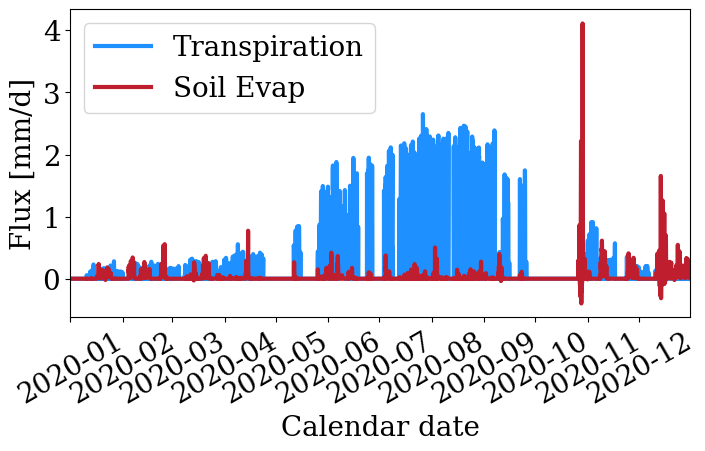

In [13]:
# Plot the transpiration and soil evaporation for our PFCLM run
fig = plt.figure(figsize=(8,4) , dpi=100)
plt.plot(t_time_datetime[:-1],clm_output['T [mm/s]']*(3600*24), label='Transpiration', color=blue,linewidth=3)  
plt.plot(t_time_datetime[:-1],clm_output['Ebs [mm/s]']*(3600*24), label='Soil Evap', color=red,linewidth=3)  
plt.xlabel('Calendar date')  
plt.xticks(rotation = 30)
plt.xlim([t_time_datetime[0],t_time_datetime[-1]]) 
plt.ylabel('Flux [mm/d]')  ## note that we converted the fluxes to mm/d
plt.legend()
plt.savefig(f'corr_rnd_one_point_PFCLM_NM_overland_flow_alpha{alpha_vG}_ET_depthvstime_WTD{head_table}_dx{PFCLM_SC_runoff.ComputationalGrid.DX}m.pdf',bbox_inches='tight', dpi = 600)

In [14]:
np.shape(clm_output_T_mmps)

(8760, 100)

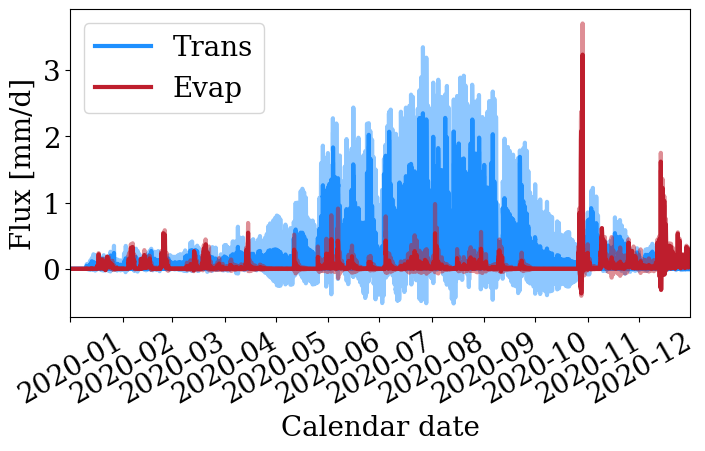

In [15]:
# Plot the transpiration and soil evaporation for our PFCLM run
fig = plt.figure(figsize=(8,4) , dpi=100)
#plt.plot(clm_output['T [mm/s]']*(3600*24), label='Transpiration', color=blue,linewidth=3)  
#plt.plot(clm_output['Ebs [mm/s]']*(3600*24), label='Soil Evap', color=red,linewidth=3)  

mean = np.mean(clm_output_T_mmps, axis=1)
std = np.std(clm_output_T_mmps, axis=1)

plt.plot(t_time_datetime[:-1],mean*(3600*24), label='Trans', color=blue,linewidth=3)
plt.plot(t_time_datetime[:-1],(mean+std)*(3600*24), color=blue,linewidth=3,alpha=0.5)
plt.plot(t_time_datetime[:-1],(mean-std)*(3600*24), color=blue,linewidth=3,alpha=0.5)

mean = np.mean(clm_output_Ebs_mmps, axis=1)
std  = np.std(clm_output_Ebs_mmps, axis=1)


plt.plot(t_time_datetime[:-1],mean*(3600*24), label='Evap', color=red,linewidth=3)
plt.plot(t_time_datetime[:-1],(mean+std)*(3600*24), color=red,linewidth=3,alpha=0.5)
plt.plot(t_time_datetime[:-1],(mean-std)*(3600*24), color=red,linewidth=3,alpha=0.5)

plt.xlabel('Calendar date')  
plt.xticks(rotation = 30)
plt.xlim([t_time_datetime[0],t_time_datetime[-1]])
plt.ylabel('Flux [mm/d]')  ## note that we converted the fluxes to mm/d
plt.legend()
plt.savefig(f'corr_rnd_mean_std_PFCLM_NM_overland_flow_alpha{alpha_vG}_ET_depthvstime_WTD{head_table}_dx{PFCLM_SC_runoff.ComputationalGrid.DX}m_sigma{Sigma_input}.pdf',bbox_inches='tight', dpi = 600)

In [16]:
mean

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       2.35382866e-06, 2.11757765e-06, 7.38929746e-07], shape=(8760,))

In [17]:
np.sum(clm_output_T_mmps*(3600/1000)*PFCLM_SC_runoff.ComputationalGrid.DX) #Transpiration in m2 in the entire year

np.float64(58.86285431721621)

In [18]:
np.sum(clm_output_Ebs_mmps*(3600/1000)*PFCLM_SC_runoff.ComputationalGrid.DX) #Evaporation in m2 in the entire year

np.float64(12.452103883220355)

In [19]:
PFCLM_SC_runoff.ComputationalGrid.DX

10.0

  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx
nx = 100, ny = 1, nz = 20
dx = 10.0, dy = 1.0, dz = 1.0
vmin: 8.851716304518681e-05, vmax: 60.48463460888108


/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)


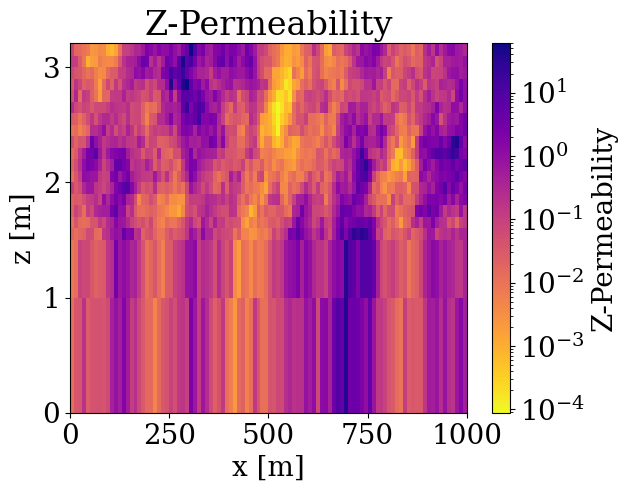

  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx
nx = 100, ny = 1, nz = 20
dx = 10.0, dy = 1.0, dz = 1.0
vmin: 0.3, vmax: 0.3


/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)


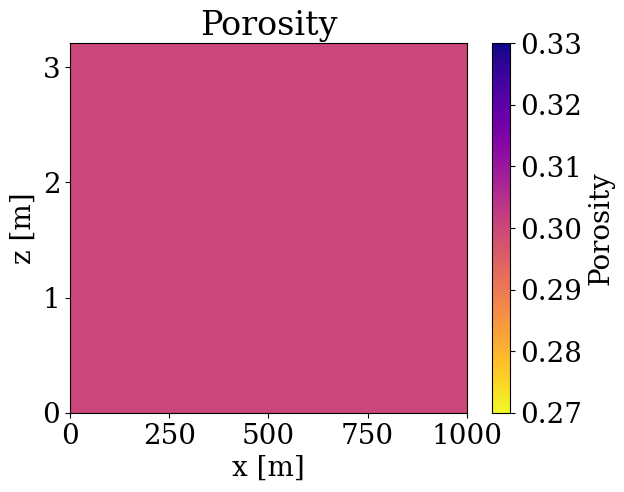

  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx
nx = 100, ny = 1, nz = 20
dx = 10.0, dy = 1.0, dz = 1.0
PFCLM_SC_runoff.out.satur.00000.pfb
vmin: 0.20008080598556466, vmax: 1.0


/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)


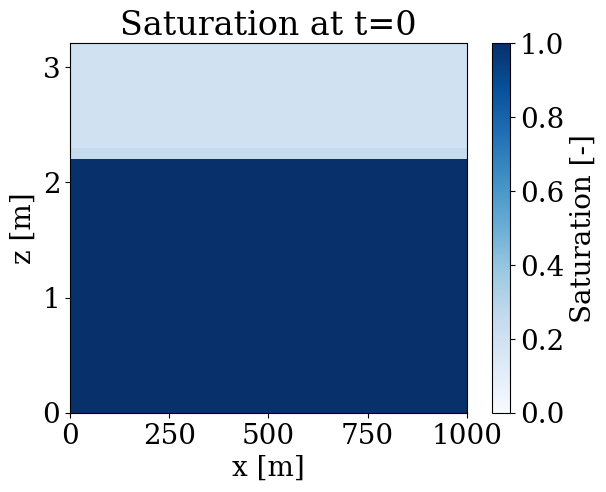

  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx
nx = 100, ny = 1, nz = 20
dx = 10.0, dy = 1.0, dz = 1.0
PFCLM_SC_runoff.out.satur.01095.pfb
vmin: 0.2000000919472182, vmax: 1.0


/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)


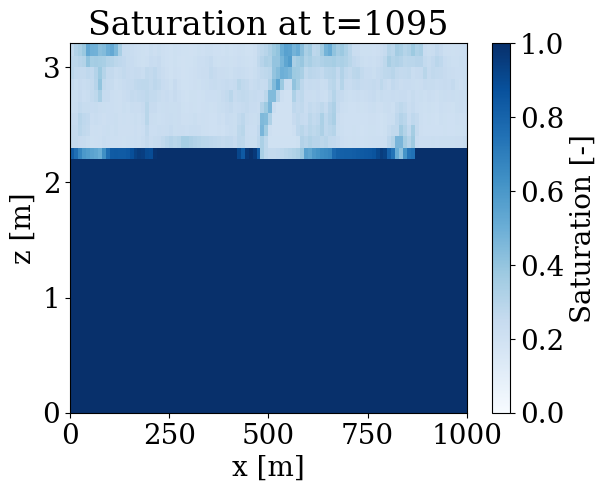

  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx
nx = 100, ny = 1, nz = 20
dx = 10.0, dy = 1.0, dz = 1.0
PFCLM_SC_runoff.out.satur.02190.pfb
vmin: 0.200152330706542, vmax: 1.0


/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)


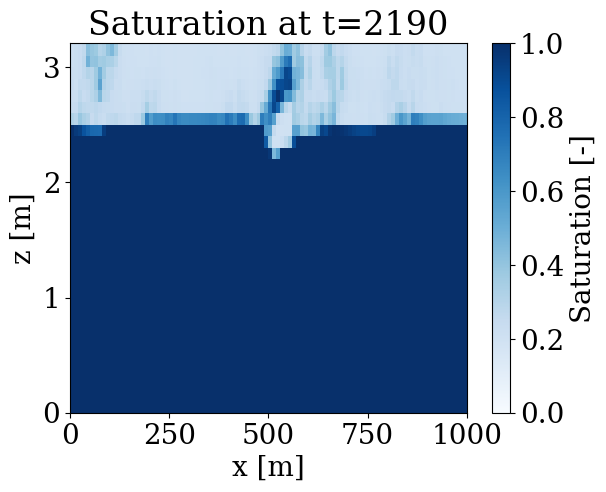

  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx
nx = 100, ny = 1, nz = 20
dx = 10.0, dy = 1.0, dz = 1.0
PFCLM_SC_runoff.out.satur.04380.pfb
vmin: 0.20052852067103524, vmax: 1.0


/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)


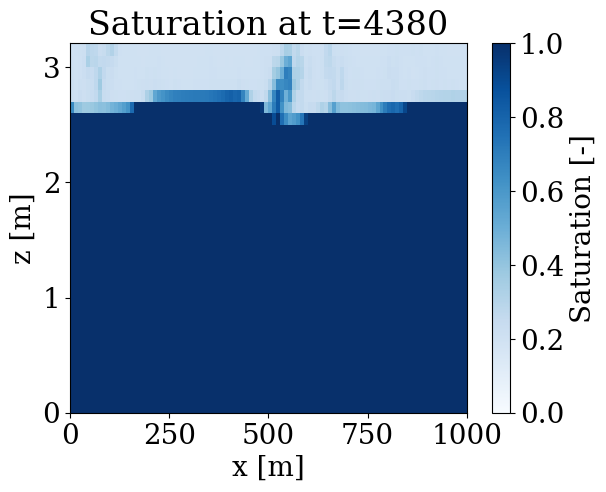

  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx
nx = 100, ny = 1, nz = 20
dx = 10.0, dy = 1.0, dz = 1.0
PFCLM_SC_runoff.out.satur.08760.pfb
vmin: 0.20304125294409603, vmax: 1.0


/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)


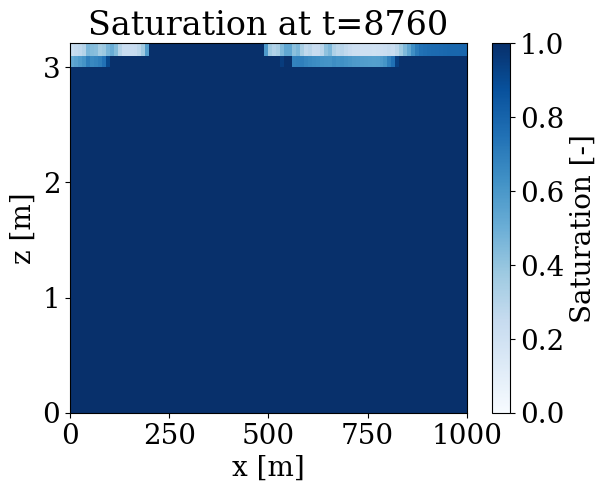

In [20]:
from plots import plot_domain_corr_rnd
Sigma_input = PFCLM_SC_runoff.Geom.domain.Perm.Sigma; #alpha_vG=100
plot_domain_corr_rnd("/home/ms6985/ParFlow-project/pfclm_sc/output_water_balance", "z-permeability", 0,alpha_vG,Sigma_input)
plot_domain_corr_rnd("/home/ms6985/ParFlow-project/pfclm_sc/output_water_balance", "porosity", 0,alpha_vG,Sigma_input)
plot_domain_corr_rnd("/home/ms6985/ParFlow-project/pfclm_sc/output_water_balance", "satur", 0,alpha_vG,Sigma_input)
plot_domain_corr_rnd("/home/ms6985/ParFlow-project/pfclm_sc/output_water_balance", "satur", 1095,alpha_vG,Sigma_input)
plot_domain_corr_rnd("/home/ms6985/ParFlow-project/pfclm_sc/output_water_balance", "satur", 2190,alpha_vG,Sigma_input)
plot_domain_corr_rnd("/home/ms6985/ParFlow-project/pfclm_sc/output_water_balance", "satur", 4380,alpha_vG,Sigma_input)
plot_domain_corr_rnd("/home/ms6985/ParFlow-project/pfclm_sc/output_water_balance", "satur", 8760,alpha_vG,Sigma_input)
#run_directory, variable, timestep=0,alpha_vG=1,Sigma_input= 0.48989794
#subsurfacestorage #ET summed on the surface

  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx


/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)


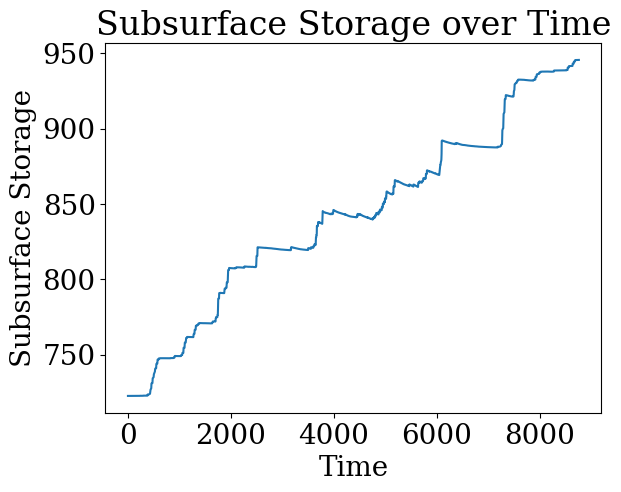

In [21]:
from plots import plot_subsurface_storage
plot_subsurface_storage("/home/ms6985/ParFlow-project/pfclm_sc/output_water_balance","PFCLM_SC_runoff", )

  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx


/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/parflow/tools/io.py:1300: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None)


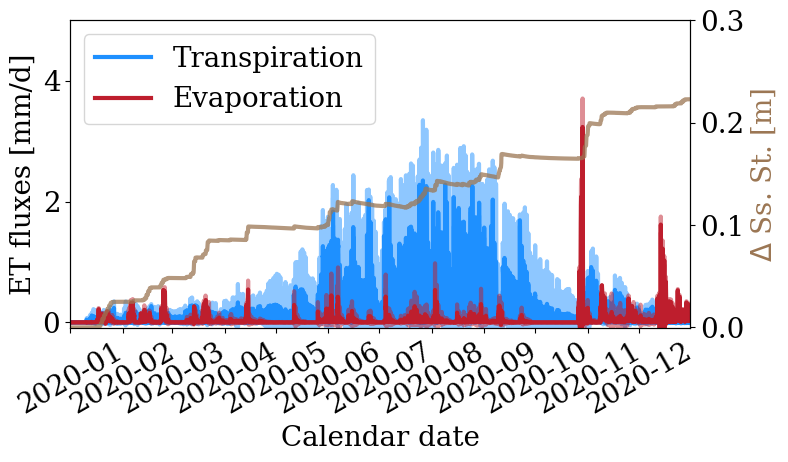

In [22]:
import parflow.tools.hydrology as hydro
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from parflow.tools.fs import get_absolute_path, cp, rm, mkdir, exists
import parflow as pf


from datetime import datetime, timedelta
d = datetime(2020, 1, 1, 0, 0)

#print(d + timedelta(hours = time_array_plot[0,2]))
time_array_one_row = np.linspace(0,8760,8761)#time_array_plot[0,:]

t_time_datetime = ([d + timedelta(hours = i) for i in time_array_one_row])

time_array_datetime = np.tile(t_time_datetime, (20,1))


def surface_subsurface_storage_combined(alpha_vG,dir_name):
    run = Run.from_definition(f'{dir_name}.pfidb')
    data = run.data_accessor
    nt = len(data.times)
    nx = data.shape[2]
    ny = data.shape[1]
    nz = data.shape[0]
    dx = data.dx
    dy = data.dy
    dz = data.dz
    
    #print(nt,nx,ny,nz,dx,dy,dz)
    
    porosity = data.computed_porosity 
    specific_storage = data.specific_storage
    
    mannings = run.Mannings.Geom.domain.Value
    
    ## remove input filenames for TopoSlopes to force the data accessor to read the output slopes
    ## this fixes a windows issue
    run.TopoSlopesX.FileName = None
    run.TopoSlopesY.FileName = None

    #Combining all outputs
    files = glob(f"{dir_name}.out.satur.*.pfb")
    saturation_arrays = pf.read_pfb_sequence(files)
    files = glob(f"{dir_name}.out.press.*.pfb")
    pressure_arrays = pf.read_pfb_sequence(files)


    subsurface_storage = np.zeros(nt+1)
    surface_storage = np.zeros(nt+1)
    data.time = 0

    
    for i, (pressure, saturation) in enumerate(zip(pressure_arrays, saturation_arrays)):
        subsurface_storage[i, ...] = np.sum(hydro.calculate_subsurface_storage(porosity, pressure, saturation, specific_storage, dx, dy, dz, mask = None),axis=(0, 1, 2))
        # total surface storage for this time step is the summation of substorage surface across all x/y slices
        surface_storage[i, ...] = np.sum( hydro.calculate_surface_storage(pressure, dx, dy, mask = None),axis=(0, 1))
        data.time = i
        #print(subsurface_storage[i, ...])
        #print(i,np.sum(porosity*saturation*dx*dy*dz[0]*(1+specific_storage)))

    # Plot the transpiration and soil evaporation for our PFCLM run
    fig,ax = plt.subplots(figsize=(8,4) , dpi=100)
    
    mean = np.mean(clm_output_T_mmps, axis=1)
    std = np.std(clm_output_T_mmps, axis=1)
    
    plt.plot(t_time_datetime[:-1],mean*(3600*24), label='Transpiration', color=blue,linewidth=3)
    plt.plot(t_time_datetime[:-1],(mean+std)*(3600*24), color=blue,linewidth=3,alpha=0.5)
    plt.plot(t_time_datetime[:-1],(mean-std)*(3600*24), color=blue,linewidth=3,alpha=0.5)
    
    mean = np.mean(clm_output_Ebs_mmps, axis=1)
    std  = np.std(clm_output_Ebs_mmps, axis=1)
    
    
    plt.plot(t_time_datetime[:-1],mean*(3600*24), label='Evaporation', color=red,linewidth=3)
    plt.plot(t_time_datetime[:-1],(mean+std)*(3600*24), color=red,linewidth=3,alpha=0.5)
    plt.plot(t_time_datetime[:-1],(mean-std)*(3600*24), color=red,linewidth=3,alpha=0.5)
    
    plt.xlabel('Calendar date')  
    plt.ylabel('ET fluxes [mm/d]')  ## note that we converted the fluxes to mm/d
    plt.legend(loc='upper left')
    plt.xticks(rotation = 30)
    plt.ylim([-0.1,5])
    ax.twinx() 
    plt.ylim([-0.001,0.3])
    plt.xlim([t_time_datetime[0],t_time_datetime[-1]])
    plt.ylabel('$\Delta $ Ss. St. [m]',color = brown) 
    #plt.xticks(chosen_date_ticks,rotation = 30)
    plt.xticks(rotation = 30)
    plt.plot(t_time_datetime,(subsurface_storage[:-1]-subsurface_storage[0])/PFCLM_SC_runoff.Geom.domain.Upper.X, linewidth=3, color = brown,label='\Delta$ Ss. St. [m]',alpha=0.75)
    plt.savefig(f'PFCLM_NM_corr_rnd_surface_subsurface_storage_alphavG{alpha_vG}_head{head_table}m_sigma{Sigma_input}.pdf',bbox_inches='tight', dpi = 600)


surface_subsurface_storage_combined(alpha_vG,base+f'/{run_name}')
